<a href="https://colab.research.google.com/github/janani1701/Summarisation-of-Text-Using-Natural-Language-Processing/blob/main/Summarization%26PresentationGenerationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view, and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  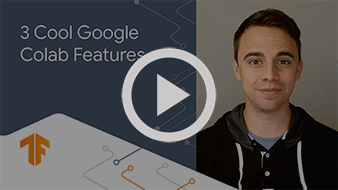
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

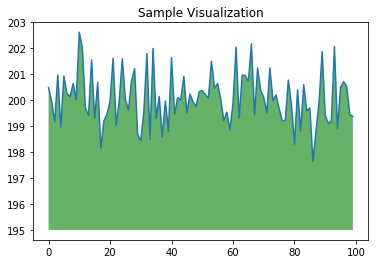

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [ ]:
pip install sumy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21694 sha256=5b887f7a3bc2ac50ec2b092492f600f39a03f50c45f622b7b271577fc0be8cc6
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=4e327e904a343dbe48fe92c1058b80c1e22f7bba62521967411b141c70693983
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.tree import Tree
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from sumy.summarizers.lsa import LsaSummarizer
from pptx import Presentation
from pptx.util import Inches, Pt
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

ModuleNotFoundError: ignored

In [ ]:
def count_tokens(text):
  tokens = nltk.word_tokenize(text)
  num_tokens=len(tokens)
  return num_tokens

In [ ]:
def sent(text):
  sents = nltk.sent_tokenize(text)
  #print(len(sents))

  #print(sents)

In [ ]:
def remove_duplicates(l):
  return list(set(l))


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from googleapiclient.discovery import build


In [ ]:
doc_file_id = '1VPIzGOEClJmdLufbuDY-b0Zl6y1L5Ja7MTDmYATqxZk'

In [ ]:
drive_service = build('drive', 'v3')


In [ ]:
request = drive_service.files().export_media(fileId=doc_file_id, mimeType='text/plain')
response = request.execute()

doc_content = response.decode('utf-8')

In [ ]:
n = count_tokens(doc_content)
print("Number of tokens:", n)

Number of tokens: 18049


In [ ]:
sents = nltk.sent_tokenize(doc_content)
print("Number of sentences:", len(sents))
print("Printing sentences:", sents)


Number of sentences: 745
Printing sentences: ['\ufeffExplain system.out.println\r\n\r\n\r\nIn Java, `System.out.println` is a commonly used method for printing output to the console.', 'It belongs to the `System` class, which is part of the `java.lang` package and is automatically imported into every Java program.', 'The `System.out` is an instance of the `PrintStream` class that represents the standard output stream, typically connected to the console or terminal.', 'The `println` method is used to print a line of text to the standard output and automatically adds a newline character (`\\n`) at the end, which means the next output will be printed on a new line.', 'The syntax of `System.out.println` is as follows:\r\n```\r\nSystem.out.println(data);\r\n```\r\nWhere `data` is the information or data that you want to display on the console.', 'It can be a string, a variable, or any other expression that can be converted to a string.', 'Examples:\r\n```java\r\nSystem.out.println("Hello, w

In [ ]:
tokens = nltk.word_tokenize(doc_content)
print("Number of tokens after tokenization:", len(tokens))
print("Printing tokens:", tokens)


Number of tokens after tokenization: 18049
Printing tokens: ['\ufeffExplain', 'system.out.println', 'In', 'Java', ',', '`', 'System.out.println', '`', 'is', 'a', 'commonly', 'used', 'method', 'for', 'printing', 'output', 'to', 'the', 'console', '.', 'It', 'belongs', 'to', 'the', '`', 'System', '`', 'class', ',', 'which', 'is', 'part', 'of', 'the', '`', 'java.lang', '`', 'package', 'and', 'is', 'automatically', 'imported', 'into', 'every', 'Java', 'program', '.', 'The', '`', 'System.out', '`', 'is', 'an', 'instance', 'of', 'the', '`', 'PrintStream', '`', 'class', 'that', 'represents', 'the', 'standard', 'output', 'stream', ',', 'typically', 'connected', 'to', 'the', 'console', 'or', 'terminal', '.', 'The', '`', 'println', '`', 'method', 'is', 'used', 'to', 'print', 'a', 'line', 'of', 'text', 'to', 'the', 'standard', 'output', 'and', 'automatically', 'adds', 'a', 'newline', 'character', '(', '`', '\\n', '`', ')', 'at', 'the', 'end', ',', 'which', 'means', 'the', 'next', 'output', 'will',

In [ ]:
stop = set(stopwords.words('english'))
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])

In [ ]:
print("Printing words after tokenizing and removing stopwords:")
list_of_words = [i.lower() for i in tokens if i.lower() not in stop]
print(list_of_words)

Printing words after tokenizing and removing stopwords:
['\ufeffexplain', 'system.out.println', 'java', '`', 'system.out.println', '`', 'commonly', 'used', 'method', 'printing', 'output', 'console', 'belongs', '`', 'system', '`', 'class', 'part', '`', 'java.lang', '`', 'package', 'automatically', 'imported', 'every', 'java', 'program', '`', 'system.out', '`', 'instance', '`', 'printstream', '`', 'class', 'represents', 'standard', 'output', 'stream', 'typically', 'connected', 'console', 'terminal', '`', 'println', '`', 'method', 'used', 'print', 'line', 'text', 'standard', 'output', 'automatically', 'adds', 'newline', 'character', '`', '\\n', '`', 'end', 'means', 'next', 'output', 'printed', 'new', 'line', 'syntax', '`', 'system.out.println', '`', 'follows', '``', '`', 'system.out.println', 'data', '``', '`', '`', 'data', '`', 'information', 'data', 'want', 'display', 'console', 'string', 'variable', 'expression', 'converted', 'string', 'examples', '``', '`', 'java', 'system.out.println

In [ ]:
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk


In [ ]:
is_noun = lambda pos: pos[:2] == 'NN'
nouns = [word for (word, pos) in pos_tag(tokens) if is_noun(pos)]

In [ ]:
print("Printing nouns:", nouns)


Printing nouns: ['\ufeffExplain', 'system.out.println', 'Java', 'System.out.println', 'method', 'output', 'console', 'System', 'class', 'part', 'java.lang', 'package', 'Java', 'program', 'System.out', 'instance', 'PrintStream', 'class', 'output', 'stream', 'console', 'terminal', 'println', 'method', 'line', 'text', 'standard', 'output', 'character', 'end', 'output', 'line', 'syntax', 'System.out.println', 'System.out.println', 'data', 'data', 'information', 'data', 'console', 'string', 'expression', 'string', 'Examples', 'java', 'System.out.println', 'Hello', 'world', 'Prints', 'Hello', 'world', 'line', 'int', 'x', '=', 'System.out.println', 'value', 'x', 'x', 'Prints', 'value', 'x', 'line', 'results', 'feedback', 'users', 'Java', 'applications', 'tool', 'developers', 'program', 'behavior', 'runtime', 'development', 'process', 'correctness', 'code', 'troubleshoot', 'issues', 'System', 'belongs', 'class', 'system', 'keyword', 'Java', 'standalone', 'keyword', 'part', 'System', 'class', '

In [ ]:
for sent in sents:
    tagged_sent = pos_tag(nltk.word_tokenize(sent))
    chunks = [chunk for chunk in ne_chunk(tagged_sent) if isinstance(chunk, Tree)]
    print("Chunks in sentence:", chunks)
    nouns_in_sent = [word for word, pos in tagged_sent if is_noun(pos)]
    print("Nouns in sentence:", nouns_in_sent)


Chunks in sentence: [Tree('GPE', [('Java', 'NNP')])]
Nouns in sentence: ['\ufeffExplain', 'system.out.println', 'Java', 'System.out.println', 'method', 'output', 'console']
Chunks in sentence: []
Nouns in sentence: ['System', 'class', 'part', 'java.lang', 'package', 'Java', 'program']
Chunks in sentence: []
Nouns in sentence: ['System.out', 'instance', 'PrintStream', 'class', 'output', 'stream', 'console', 'terminal']
Chunks in sentence: []
Nouns in sentence: ['println', 'method', 'line', 'text', 'standard', 'output', 'character', 'end', 'output', 'line']
Chunks in sentence: []
Nouns in sentence: ['syntax', 'System.out.println', 'System.out.println', 'data', 'data', 'information', 'data', 'console']
Chunks in sentence: []
Nouns in sentence: ['string', 'expression', 'string']
Chunks in sentence: []
Nouns in sentence: ['Examples', 'java', 'System.out.println', 'Hello', 'world']
Chunks in sentence: []
Nouns in sentence: ['Prints', 'Hello', 'world']
Chunks in sentence: []
Nouns in sentence

In [ ]:
LANGUAGE = "english"
SENTENCES_COUNT = 5
parser = PlaintextParser.from_string(doc_content, Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)
summarizer = LsaSummarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

output = []
for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)
    output.append(sentence)

");`, it means you are using the `println` method of the `PrintStream` class to print the specified string to the standard output (console) followed by a newline character (`\n`).
They play a crucial role in structuring a Java program and enable you to break down complex tasks into smaller, manageable pieces of code.
In conclusion, multiple inheritance has the potential to provide great code reusability and functionality, but it comes with challenges like the diamond problem and increased complexity.
**Extension without Modification:** When you design your code with polymorphism in mind, you can define a common interface or superclass that various classes implement or inherit from.
To avoid these issues, it's recommended to follow good object-oriented design principles, use polymorphism, and prefer other techniques like method overriding and abstract classes to achieve flexibility and maintainability in your codebase.


In [ ]:
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Text to PPT Summarization"
subtitle.text = "Welcome"

In [ ]:
bullet_slide_layout = prs.slide_layouts[1]
for i, sentence in enumerate(output):
    if i == 0:
        slide = prs.slides.add_slide(title_slide_layout)
        title = slide.shapes.title
        title.text = "Summarized Sentences"
    slide = prs.slides.add_slide(bullet_slide_layout)
    shapes = slide.shapes
    title_shape = shapes.title
    body_shape = shapes.placeholders[1]
    title_shape.text = f'Slide {i+1}'
    tf = body_shape.text_frame
    p = tf.add_paragraph()
    p.text = str(sentence)  # Convert Sentence object to string
    p.level = 1

# Save the PowerPoint presentation
prs.save("SummarizationPresentation.pptx")